<a href="https://colab.research.google.com/github/GEETHIKACHINNI2/chinni-27/blob/main/FMML_2024_Module_5_Lab_3_IM_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3
# Classification II : Information Metrics and generalizability of Decision Trees

```
Module Coordinator : Nikunj Nawal
```

### RECAP:

In the last lab, we learnt:

- What is a decision tree and how is a DT used to made a prediction.
- How the complexity of tree effects its performance. (An example where increasing the complexity improves the performance.)
- Notion of Entropy and Information Gain and how they can be used to create a tree.
- Nature of decision boundaries made by DTs.


### In this lab:

- Introduction to Gini Index and how can it be used to create decision tree.
- Curse of Overfitting and how it affects decision trees.
- Application of Decision Trees on a real dataset and further experiments.



---

## Gini Impurity:

Gini Impurity is another metric like Entropy which can be used to score a group's homogenity.
A group's Gini Impurity is given by:

$$ \text{Gini Index} = 1 - \sum_{i=1}^{c} p_i^2 $$

Whichever division leads to minimum impurity among the divided class is chosen to be the split at that stage.

`Impurity of a division =  Weighted sum of the impurity of the subgroups made after the division`

Among Gini impurity and Information Gain, there isn't a clear cut better method of developing a decision tree. Though many a times Gini Impurity is the preferred method since it is computationally lesser expensive.

---




In [1]:
#Importing the necessary packages

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt

In [2]:
def performExperiment(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion = "gini", min_samples_split : int = 2 , min_samples_leaf = 1, drawTree = (8,6)):
  #Importing the Decision tree classifier from sklearn:

  clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 0,\
                                    )
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

  if drawTree:
    print("Here is a diagram of the tree created to evaluate each sample:")
    fig, ax = plt.subplots(figsize=drawTree)
    imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names = feature_names, class_names = class_names, impurity=False, proportion=True, rounded=True, fontsize = 10)
    plt.show()

def returnAccuracy(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion = "gini", min_samples_split : int = 2 , min_samples_leaf = 1):
  clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 0,\

                                    )
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  return accuracy_score(y_pred, y_test)

def giveAnExample(n : int):
  performExperiment((X_train, y_train),  (X_test, y_test), feature_names = iris["feature_names"], class_names = iris["target_names"], max_depth = n)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.show()

Let us create a synthetic dataset

In [3]:
np.random.seed(0)

ar = np.vstack(     [\
                    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 50, ),\
                    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 50, )
                    ]\
              )

testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

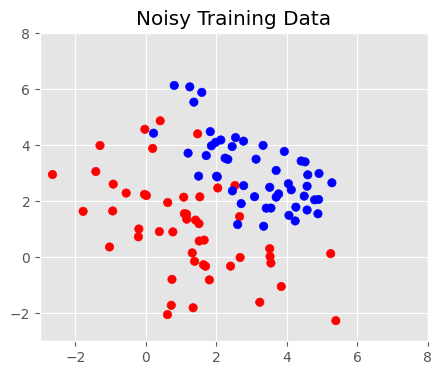

(-3.0, 8.0)

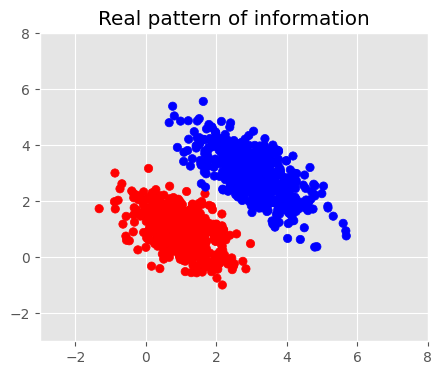

In [ ]:
plt.figure(figsize=(5,4))
plt.style.use("ggplot")
plt.scatter(ar[:, 0], ar[:, 1], c = np.array(["r"] * int((ar.shape[0]/2)) + ["b"] * int((ar.shape[0]/2))), )
plt.title("Noisy Training Data")
plt.xlim((-3, 8))
plt.ylim((-3, 8))

plt.show()

plt.figure(figsize=(5,4))
plt.title("Real pattern of information")
plt.scatter(testAr[:, 0], testAr[:, 1], c = np.array(["r"] * int((testAr.shape[0]/2)) + ["b"] * int((testAr.shape[0]/2))), )

plt.xlim((-3, 8))
plt.ylim((-3, 8))

Text(0.5, 0, 'Depth of the tree')

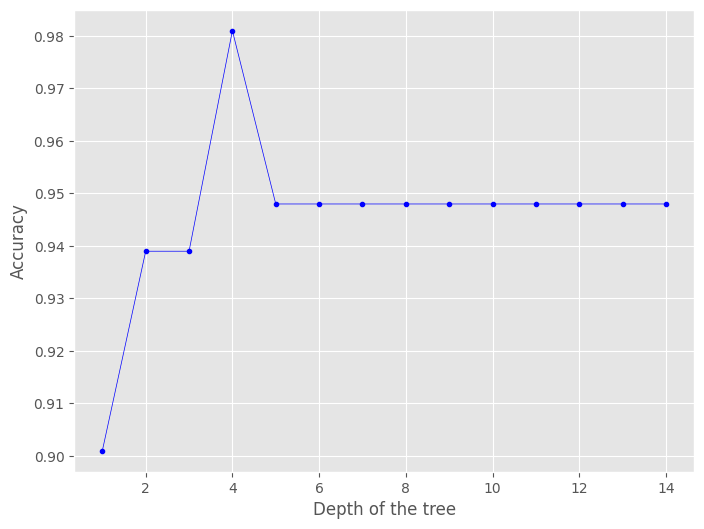

In [ ]:
X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))

plt.figure(figsize=(8,6))
fro, to = 1, 15
plt.plot(range(fro, to), [returnAccuracy((X, y), (testAr, testy), max_depth = i) for i in range(fro, to)], "b.-", linewidth=0.5)
plt.ylabel("Accuracy")
plt.xlabel("Depth of the tree")

In [4]:
def boundaryExp(d) :
  clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = d)
  pair = [0, 1]
  clf.fit(X[:, pair], y)
  print("Depth = {}".format(d))
  plotDecisionBoundary(X, y, pair, clf)
  plt.show()


_ = [boundaryExp(i) for i in [1, 2, 4, 8]]

NameError: name 'X' is not defined

Accuracy of the decision tree on the test set: 

0.939


Here is a diagram of the tree created to evaluate each sample:


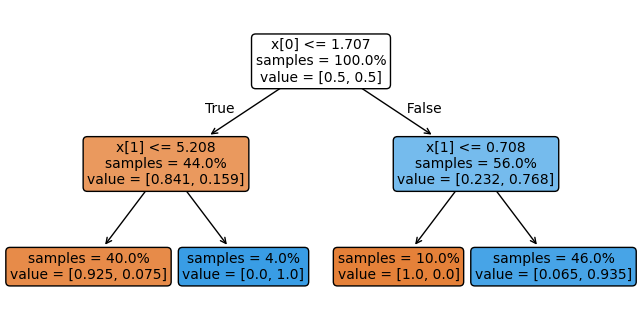

In [ ]:
plt.style.use("default")
performExperiment((X, y), (testAr, testy), max_depth = 2, drawTree = (8,4))

In [ ]:
plt.style.use("default")
performExperiment((X, y), (testAr, testy), max_depth = 4, drawTree= (12, 8))

In [ ]:
plt.style.use("default")
performExperiment((X, y), (testAr, testy), max_depth = 8, drawTree = False)

Accuracy of the decision tree on the test set: 

0.948




Now that we have looked at the curse of overfitting and its consequence on the test accuracy, let us try to delve deeper and try to understand that why is it such a serious issue especially for Decision Tree.

---

## Finding Pattern out of nowhere?


In the following cell we are generating a series of random numbers from a 2-D uncorrelated Gaussian distribution. And then we randomly assign a class to each of these datapoints. i.e There exists no real pattern in the dataset and we are simply giving them a class arbitrarily.

Now let us see how out decision tree does on this when the same set is used as the test set as well.

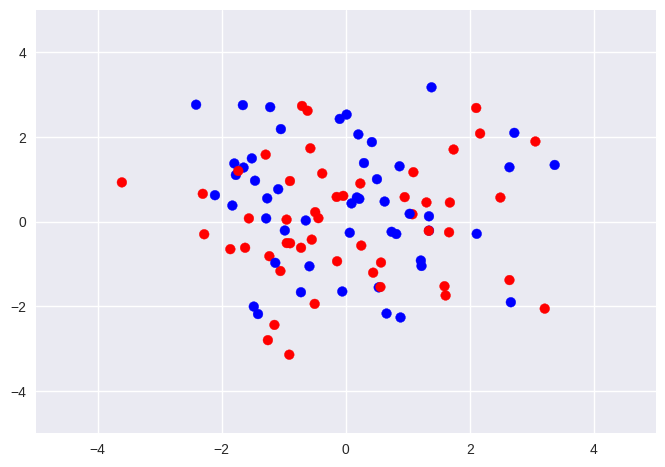

In [ ]:
SIZE_DECOY = 100
np.random.seed(0)
simpleDat = np.random.multivariate_normal((0, 0), [[2, 0], [0, 2]], size = SIZE_DECOY)
decoyY = np.random.randint(0, 2, size = SIZE_DECOY)
COLS = ["red", "blue"]
plt.style.use("seaborn-v0_8")
plt.scatter(simpleDat[:, 0], simpleDat[:, 1], c = [COLS[i] for i in decoyY])
plt.xlim((-5, 5)), plt.ylim((-5, 5))
plt.show()

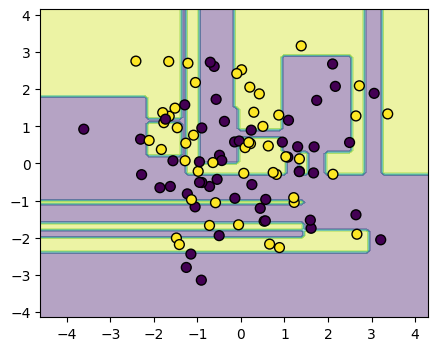

Accuracy of the decision tree on the test set: 

1.000




In [ ]:

clf = tree.DecisionTreeClassifier(random_state = 0)
pair = [0, 1]
clf.fit(simpleDat[:, pair], decoyY)
plt.style.use("default")
plotDecisionBoundary(simpleDat, decoyY, pair, clf)
plt.show()

performExperiment((simpleDat, decoyY), (simpleDat, decoyY), drawTree=False)

Wow, we see that our decision tree is able to predict the values in our train set with $100\%$  accuracy!

That is not a surprise if we pay attention to the nature of Decision Trees. They are in fact capable of **adapting completely to any discrete binary function that exists**. This behavious can be explained using the point they can be seen as nothing but piecewise function definition itself.

Does that mean that our decision tree has learnt something? Let us explore by testing it on another set of points taken from the same distribution.

In [ ]:
SIZE_DECOY = 100
np.random.seed(1)
testSimpleDat = np.random.multivariate_normal((0, 0), [[2, 0], [0, 2]], size = SIZE_DECOY)
testDecoyY = np.random.randint(0, 2, size = SIZE_DECOY)
performExperiment((simpleDat, decoyY), (testSimpleDat, testDecoyY), drawTree=False)

Accuracy of the decision tree on the test set: 

0.480




We infact see that our decision tree has not learnt much since its accuracy is $48\%$ on a set that it hasn't seen before which is to be expected since there are only 2 classes to predict.

---

## Experiment on Titanic Dataset

`Reference Dataset taken from: https://www.kaggle.com/c/titanic/data`


The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Our task in rest of today's lab is to use decision trees to predict if a person would be able to survive or not.

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

In [ ]:
import os
os.system("wget https://raw.githubusercontent.com/Foundations-in-Modern-Machine-Learning/course-contents/main/Classification2/data/titanic/train.csv")

0

In [ ]:
import os
os.listdir()

['.config', 'train.csv', 'sample_data']

In [ ]:
import pandas as pd
trainDf = pd.read_csv("train.csv")

In [ ]:
# Preprocessing:

trainDf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
trainDf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
for idx, row in trainDf.iterrows():
  if row["Sex"] == "female":
    trainDf.at[idx, "Sex"] = 0
  else:
    trainDf.at[idx, "Sex"] = 1

NameError: name 'trainDf' is not defined

In [5]:
# Since we are only exploring, lets make a validation set out of trainDf:

trainSet, testSet = train_test_split(trainDf, random_state = 0)

NameError: name 'trainDf' is not defined

In [7]:
def relevantInfo(df):
  X = df.iloc[:, [2, 4, 5, 6, 7, 9]]
  y = df.iloc[:, 1]

  #Preprocessing to handle the missing data using a regressor
  imp = IterativeImputer(max_iter = 10, random_state=0)
  imp.fit(X)
  newDf = imp.transform(X)

  return newDf , y.to_numpy()

In [ ]:
trainX, trainy = relevantInfo(trainSet)
testX, testy = relevantInfo(testSet)

Accuracy of the decision tree on the test set: 

0.816


Here is a diagram of the tree created to evaluate each sample:


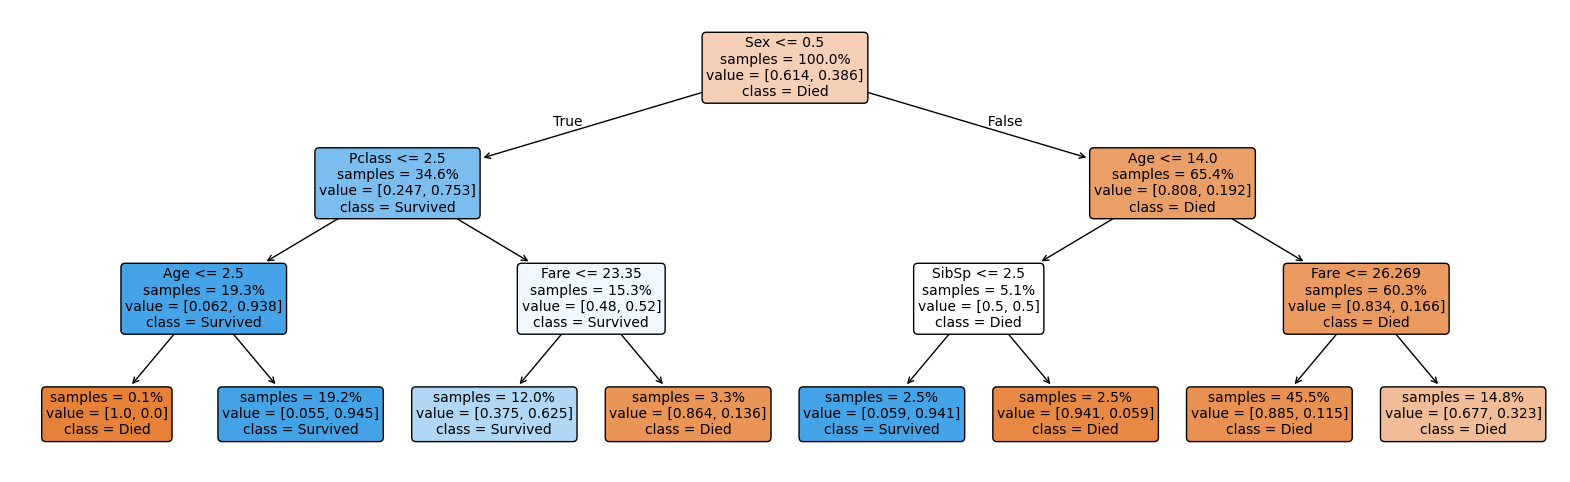

In [ ]:
performExperiment((trainX, trainy), (testX, testy), max_depth = 3, feature_names=[trainDf.columns[i] for i in [2, 4, 5, 6, 7, 9]], class_names=["Died", "Survived"], drawTree=(20, 6))

In [ ]:
MAX_DEPTH = 8 #@param {type: "slider", min: 2, max: 10}
CRITERION =  "gini" #@param ["gini", "entropy"]
MIN_SAMPLES_TO_SPLIT = 4 #@param {type:"slider", min:2, max:20, step:2}
MIN_SAMPLES_IN_LEAF = 6 #@param {type: "slider", min: 1, max: 50}

plt.style.use("default")
performExperiment((trainX, trainy),\
                  (testX, testy),\
                  max_depth = MAX_DEPTH,\
                  feature_names=[trainDf.columns[i] for i in [2, 4, 5, 6, 7, 9]],\
                  class_names=["Died", "Survived"],\
                  min_samples_split = MIN_SAMPLES_TO_SPLIT,\
                  min_samples_leaf = MIN_SAMPLES_IN_LEAF,\
                  drawTree=False)

Accuracy of the decision tree on the test set: 

0.821




## Task 1
Iterate over all the possible values for depth and plot the accuracy graph.

To iterate over all possible values for depth and plot the accuracy graph, follow these steps:

Steps:

1. Train a model (e.g., Decision Tree or Random Forest) with different depth values.

2. Evaluate accuracy on validation/test data.

3. Plot accuracy vs. depth using Matplotlib.

Example: Decision Tree Classifier

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Iterate over different depth values
depths = range(1, 21)  # Depth from 1 to 20
train_accuracies = []
test_accuracies = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Calculate accuracy
    train_accuracies.append(accuracy_score(y_train, model.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, model.predict(X_test)))

# Plot the graph
plt.figure(figsize=(10, 5))
plt.plot(depths, train_accuracies, label="Train Accuracy", marker='o')
plt.plot(depths, test_accuracies, label="Test Accuracy", marker='s')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs. Depth")
plt.legend()
plt.show()



Explanation:

The model is trained with different max_depth values.

It records accuracy on both training and test sets.

The graph helps visualize overfitting (when training accuracy is high but test accuracy drops).




## Task 2
Find the most optimum depth possible.
To find the most optimum depth for a model (e.g., Decision Tree), we can use cross-validation to select the depth that maximizes test accuracy while avoiding overfitting.

Steps:

1. Train a model with different depth values.


2. Use cross-validation to evaluate performance.


3. Select the depth with the highest validation accuracy.




---

Example: Finding Optimum Depth for Decision Tree

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Iterate over different depth values
depths = range(1, 21)  # Depths from 1 to 20
mean_accuracies = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    mean_accuracies.append(np.mean(scores))

# Find the optimal depth (maximum accuracy)
optimal_depth = depths[np.argmax(mean_accuracies)]
max_accuracy = max(mean_accuracies)

# Plot accuracy vs. depth
plt.figure(figsize=(10, 5))
plt.plot(depths, mean_accuracies, marker='o', linestyle='dashed', label="Validation Accuracy")
plt.axvline(optimal_depth, color='r', linestyle='--', label=f'Optimal Depth = {optimal_depth}')
plt.xlabel("Tree Depth")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Optimal Tree Depth Selection")
plt.legend()
plt.show()

print(f"Optimal Depth: {optimal_depth} with Accuracy: {max_accuracy:.4f}")


---

Explanation:

Uses cross-validation (cv=5) to get stable accuracy estimates.

Finds the depth with the highest validation accuracy.

Plots the accuracy graph and marks the optimal depth.




## Task 3
Select a dataset from python library and repeat Task 1 and Task 2
Let's use the Wine dataset from sklearn.datasets and repeat the process:

1. Train a Decision Tree Classifier for different depths and plot accuracy.


2. Find the most optimal depth using cross-validation.




---

Step 1: Plot Accuracy vs. Depth

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine

# Load dataset
data = load_wine()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Iterate over different depth values
depths = range(1, 21)
train_accuracies = []
test_accuracies = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Compute accuracy
    train_accuracies.append(accuracy_score(y_train, model.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, model.predict(X_test)))

# Plot the accuracy graph
plt.figure(figsize=(10, 5))
plt.plot(depths, train_accuracies, label="Train Accuracy", marker='o')
plt.plot(depths, test_accuracies, label="Test Accuracy", marker='s')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs. Depth (Wine Dataset)")
plt.legend()
plt.show()


---

Step 2: Find the Optimal Depth

from sklearn.model_selection import cross_val_score

# Cross-validation to find optimal depth
mean_accuracies = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    mean_accuracies.append(np.mean(scores))

# Find the depth with max accuracy
optimal_depth = depths[np.argmax(mean_accuracies)]
max_accuracy = max(mean_accuracies)

# Plot accuracy vs. depth
plt.figure(figsize=(10, 5))
plt.plot(depths, mean_accuracies, marker='o', linestyle='dashed', label="Validation Accuracy")
plt.axvline(optimal_depth, color='r', linestyle='--', label=f'Optimal Depth = {optimal_depth}')
plt.xlabel("Tree Depth")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Optimal Tree Depth Selection (Wine Dataset)")
plt.legend()
plt.show()

print(f"Optimal Depth: {optimal_depth} with Accuracy: {max_accuracy:.4f}")


---

Results & Insights

First graph: Shows overfitting when depth increases.

Second graph: Selects the best depth using cross-validation.

---

End of Lab 3